In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from HelperFcns import mean_daily_features
from scipy.stats import pearsonr, entropy, iqr, spearmanr
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('paper',font_scale=1.8)
sns.despine()
import itertools
%load_ext autoreload
%autoreload 2
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 432x288 with 0 Axes>

## Home data analysis

In [3]:
Datahome = pd.read_csv('../Data/GPSandClinicalData_Home.csv')

In [4]:
Datahome['Duration_Wearing']=Datahome['Duration']*Datahome['Wear Frac']

In [5]:
Datahome.head()

,Wear Frac,Duration,Mean Speed,SubjID,NewBrace,LocID,Steps,Steps per Hour,Steps per Hour Wear,Date,Cadence,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast,Duration_Wearing
0,0.033473,2.652778,0.076119,CBR21,1,0,30,11.308901,337.853403,2016-08-18,0.333333,65,poliomyelitis,60.0,231.93,0.69,0.85,0.088796
1,0.000000,18.044444,0.037787,CBR21,1,0,0,0.000000,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000
2,0.000000,4.041667,0.063728,CBR21,1,0,0,0.000000,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000
3,0.000000,12.708333,0.046796,CBR21,1,0,0,0.000000,NaN,2016-08-20,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000
4,0.000000,1.600000,0.212844,CBR21,1,0,0,0.000000,NaN,2016-08-20,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000


In [6]:
Datahome.columns

Index(['Wear Frac', 'Duration', 'Mean Speed', 'SubjID', 'NewBrace', 'LocID',
       'Steps', 'Steps per Hour', 'Steps per Hour Wear', 'Date', 'Cadence',
       'Age', 'Diagnosis', 'BaselineYrs', '6mwt', '10mwt_ss', '10mwt_fast',
       'Duration_Wearing'],
      dtype='object')

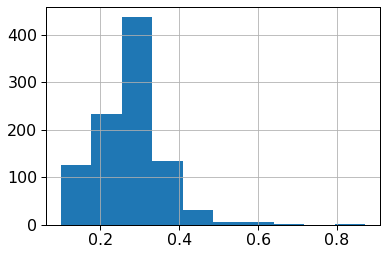

In [7]:
Datahome['Cadence'].hist()

In [8]:
#Mean features across days per subject
homedur = mean_daily_features(Datahome)

/Users/luca/Projects/RIC/CbraceGPS/CbrAnalysis/HelperFcns.py:16: RuntimeWarning: Mean of empty slice
  cadence = np.nanmean(d['Cadence'])


## Home mean features across days per subject

In [10]:
homedur.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs
0,CBR21,6.799006,6.284861,0.023871,1,231.93,0.69,32.200000,0.206293,17.071111,65.0,60.0
1,CBR30,5.065320,3.038611,0.626585,1,452.17,1.20,1706.117647,0.281388,13.980556,55.0,37.0
2,CBR22,0.251551,0.185833,0.825910,1,332.61,1.00,105.583333,0.356069,0.222778,28.0,2.0
3,CBR27,21.142396,23.997222,0.004652,1,78.82,0.33,15.062500,0.194220,23.997222,72.0,70.0
4,CBR26,11.163413,9.988889,0.204154,1,512.14,1.15,329.650794,0.327492,21.665000,52.0,0.5


In [6]:
# plt.figure(figsize=(16,5))
# sns.boxplot(data=Datahome,x='SubjID',y='Duration_Wearing',hue='NewBrace')
# plt.title('Usage time at Home')

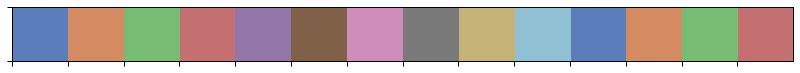

In [12]:
sns.palplot(sns.color_palette("muted", n_colors=14, desat=.7))

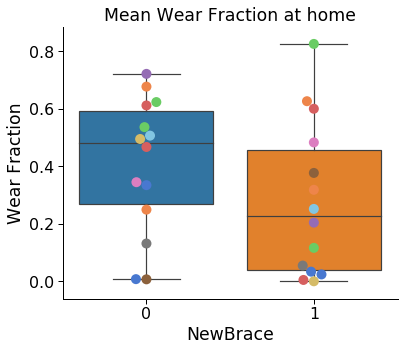

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(x='NewBrace', y='Wear Fraction',data=homedur)
ax = sns.swarmplot(x='NewBrace', y='Wear Fraction', hue='SubjID', data=homedur, palette='muted',size=10)
ax.set_title('Mean Wear Fraction at home')
sns.despine()
ax.get_legend().remove()

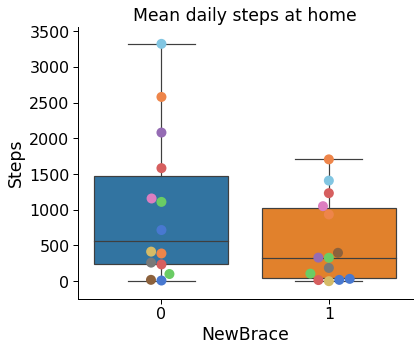

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(x='NewBrace', y='Steps',data=homedur)
ax = sns.swarmplot(x='NewBrace', y='Steps', hue='SubjID', data=homedur, palette='muted',size=10)
ax.set_title('Mean daily steps at home')
sns.despine()
ax.get_legend().remove()

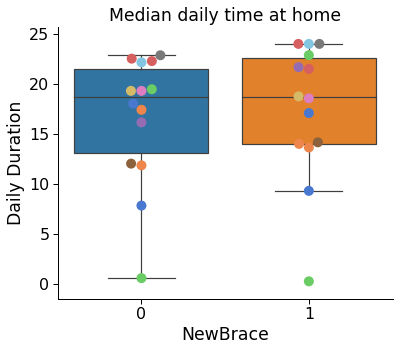

In [15]:
plt.figure(figsize=(6,5))
sns.boxplot(x='NewBrace', y='Daily Duration',data=homedur)
ax = sns.swarmplot(x='NewBrace', y='Daily Duration', hue='SubjID', data=homedur, palette='muted',size=10)
ax.set_title('Median daily time at home')
sns.despine()
ax.get_legend().remove()

## Community data analysis

In [9]:
# Data = pd.read_csv('GPSData.csv')
Data = pd.read_csv('../Data/GPSandClinicalData.csv')

In [10]:
Data.head()

,Wear Frac,DestinationType,Distance,Duration,Mean Speed,TripDuration,Relative_Freq,Relative_Duration,SubjID,NewBrace,...,Steps per Hour,Steps per Hour Wear,Date,Cadence,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast
0,0.015000,Res,12.229512,2.772222,0.215601,NaN,0.014925,0.021452,CBR21,1,...,0.0,0.0,2016-08-18,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85
1,0.063091,Inst,6.302016,1.758333,0.230411,NaN,0.014925,0.013607,CBR21,1,...,0.0,0.0,2016-08-18,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85
2,0.000000,Com,5.095353,1.016389,0.591493,NaN,0.014925,0.007865,CBR21,1,...,0.0,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85
3,0.000000,Com,5.172335,0.366111,1.607549,NaN,0.029851,0.004252,CBR21,1,...,0.0,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85
4,0.000000,Com,2.871296,0.052778,4.483316,NaN,0.044776,0.001827,CBR21,1,...,0.0,NaN,2016-08-19,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85


In [11]:
Data.columns

Index(['Wear Frac', 'DestinationType', 'Distance', 'Duration', 'Mean Speed',
       'TripDuration', 'Relative_Freq', 'Relative_Duration', 'SubjID',
       'NewBrace', 'Steps', 'Steps per Hour', 'Steps per Hour Wear', 'Date',
       'Cadence', 'Age', 'Diagnosis', 'BaselineYrs', '6mwt', '10mwt_ss',
       '10mwt_fast'],
      dtype='object')

In [12]:
#compute mean duration/day feature across days for each participant
dur = mean_daily_features(Data)

/Users/luca/Projects/RIC/CbraceGPS/CbrAnalysis/HelperFcns.py:16: RuntimeWarning: Mean of empty slice
  cadence = np.nanmean(d['Cadence'])


Text(0.5, 0, 'Cadence [steps/s]')

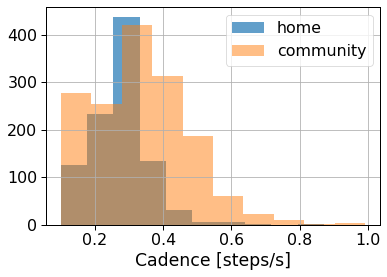

In [16]:
Datahome.Cadence.hist(alpha=0.7)
Data.Cadence.hist(alpha=.5)
plt.legend(['home','community'])
plt.xlabel('Cadence [steps/s]')

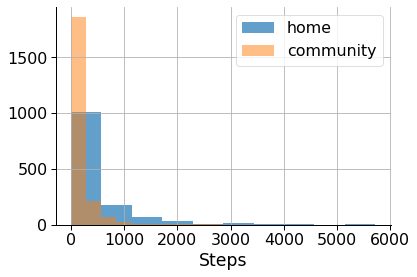

In [15]:
Datahome.Steps.hist(alpha=0.7)
Data.Steps.hist(alpha=.5)
plt.legend(['home','community'])
plt.xlabel('Steps')
sns.despine()

## Community mean features across days per subject

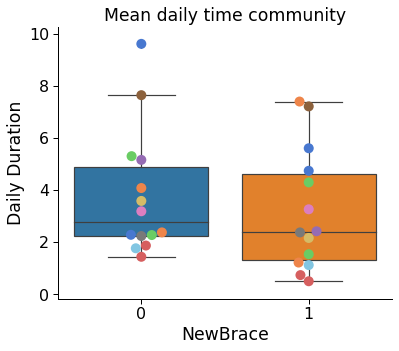

In [26]:
plt.figure(figsize=(6,5))
sns.boxplot(x='NewBrace', y='Daily Duration',data=dur)
ax = sns.swarmplot(x='NewBrace', y='Daily Duration', hue='SubjID', data=dur, palette='muted',size=10)
ax.set_title('Mean daily time community')
sns.despine()
ax.get_legend().remove()

In [50]:
# fig = plt.figure(figsize=(18,6))
# fig.add_subplot(121)
# ax = sns.boxplot(x='SubjID', y='Steps', hue='NewBrace', data=Datahome)
# ax=plt.xticks(rotation=90)
# plt.title('Home')
# sns.despine()
# fig.add_subplot(122)
# ax = sns.boxplot(x='SubjID', y='Steps', hue='NewBrace', data=Data)
# plt.title('Community')
# ax=plt.xticks(rotation=90)
# sns.despine()


In [94]:
Data.columns

Index(['Wear Frac', 'DestinationType', 'Distance', 'Duration', 'Mean Speed',
       'TripDuration', 'Relative_Freq', 'Relative_Duration', 'SubjID',
       'NewBrace', 'Steps', 'Steps per Hour', 'Steps per Hour Wear', 'Date',
       'Cadence', 'Age', 'Diagnosis', 'BaselineYrs', '6mwt', '10mwt_ss',
       '10mwt_fast'],
      dtype='object')

In [95]:
# Data['Duration_Wearing']=Data['Duration']*Data['Wear Frac']
# plt.figure(figsize=(16,5))
# sns.boxplot(data=Data ,x='SubjID',y='Duration_Wearing',hue='NewBrace')

In [53]:
subjmobility=dur['Daily Duration']/homedur['Daily Duration']

In [54]:
dur.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,Steps,Cadence,Daily Duration
0,CBR21,1.928765,0.661944,0.033078,1,231.93,5.776119,0.362795,5.595833
1,CBR30,1.001469,0.411111,0.938007,1,452.17,2169.580460,0.322353,7.388889
2,CBR22,2.207157,0.511111,0.845676,1,332.61,630.843137,0.284543,4.285000
3,CBR27,0.491389,0.491389,1.000000,1,133.60,51.000000,0.202273,0.491389
4,CBR26,0.536108,0.224167,0.974758,1,512.14,677.558442,0.361475,2.408611


## Combined Home-Community analysis

In [17]:
# fig, ax = plt.subplots(1,2, figsize=(18,6), sharey=True)
# ax = ax.ravel()
# sns.boxplot(x='SubjID', y='Steps', hue='NewBrace', data=Datahome, ax=ax[0])
# locs, labels = plt.xticks()
# ax[0].set_xticklabels(labels,rotation=90)
# ax[0].set_title('Home')
# sns.despine()
# sns.boxplot(x='SubjID', y='Steps', hue='NewBrace', data=Data, ax=ax[1])
# ax[1].set_title('Community')
# plt.xticks(rotation=90)
# sns.despine()

In [17]:
#summary plot
homedur['Loc']='Home'
dur['Loc']='Community'
durdata = pd.concat([homedur,dur])

In [18]:
durdata.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs,Loc
0,CBR21,6.799006,6.284861,0.023871,1,231.93,0.69,32.200000,0.206293,17.071111,65.0,60.0,Home
1,CBR30,5.065320,3.038611,0.626585,1,452.17,1.20,1706.117647,0.281388,13.980556,55.0,37.0,Home
2,CBR22,0.251551,0.185833,0.825910,1,332.61,1.00,105.583333,0.356069,0.222778,28.0,2.0,Home
3,CBR27,21.142396,23.997222,0.004652,1,78.82,0.33,15.062500,0.194220,23.997222,72.0,70.0,Home
4,CBR26,11.163413,9.988889,0.204154,1,512.14,1.15,329.650794,0.327492,21.665000,52.0,0.5,Home


In [19]:
print('MedianHome Baseline = %.2f h'%homedur[homedur['NewBrace']==0]['Duration_Median'].median())
print('MedianHome Cbrace = %.2f h'%homedur[homedur['NewBrace']==1]['Duration_Median'].median())
print('MedianComm Baseline = %.2f h'%dur[dur['NewBrace']==0]['Duration_Median'].median())
print('MedianComm Cbrace = %.2f h'%dur[dur['NewBrace']==1]['Duration_Median'].median())

MedianHome Baseline = 7.62 h
MedianHome Cbrace = 9.27 h
MedianComm Baseline = 0.31 h
MedianComm Cbrace = 0.38 h


In [20]:
# print('MedianHome difference = %.2f h'%(homedur[homedur['NewBrace']==1]['Duration_Median'].median() - 
#      homedur[homedur['NewBrace']==0]['Duration_Median'].median()))

# print('MedianComm difference = %.2f h'%(homedur[homedur['NewBrace']==1]['Duration_Median'].median() - 
#      homedur[homedur['NewBrace']==0]['Duration_Median'].median()))


In [21]:
durdata.columns

Index(['SubjID', 'Duration_Mean', 'Duration_Median', 'Wear Fraction',
       'NewBrace', '6mwt', '10mwt_ss', 'Steps', 'Cadence', 'Daily Duration',
       'Age', 'BaselineYrs', 'Loc'],
      dtype='object')

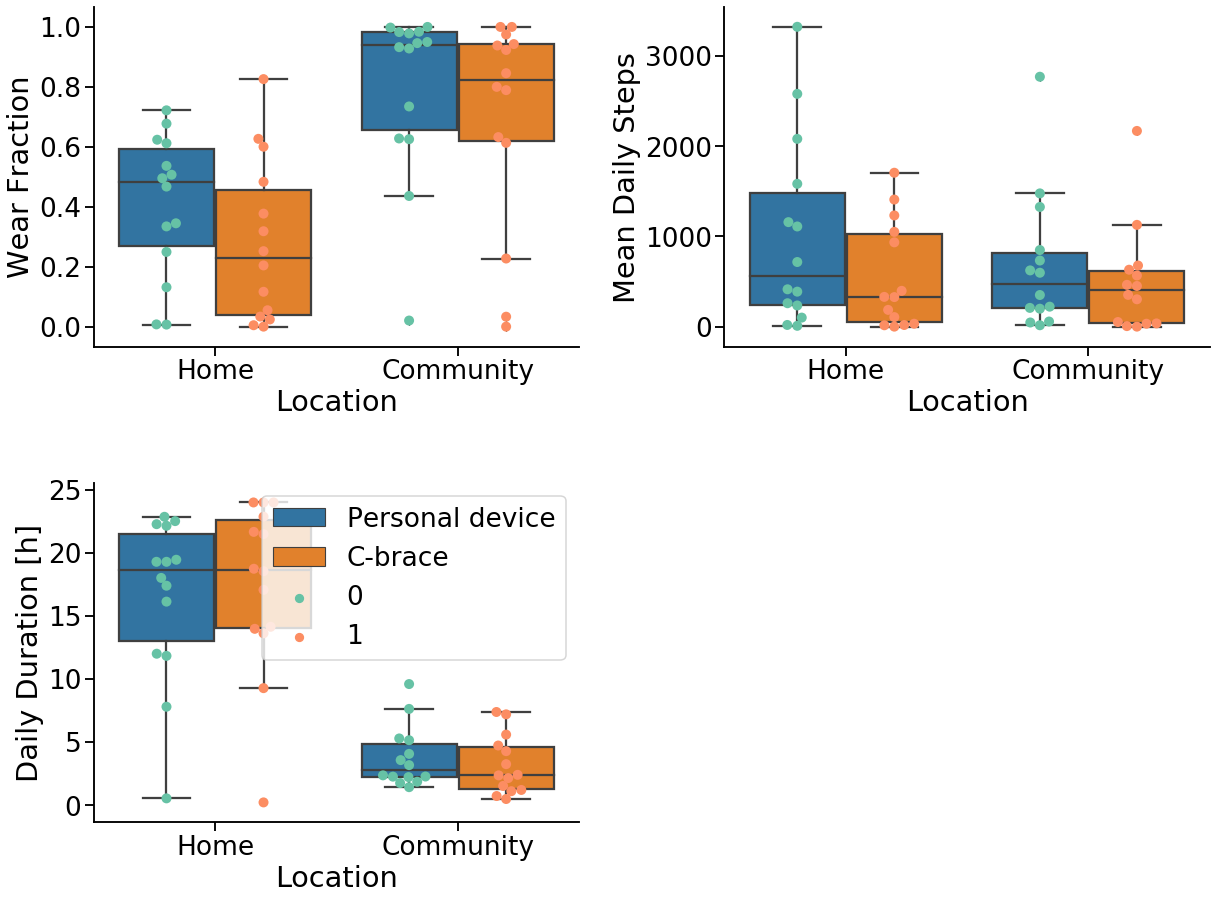

In [22]:
sns.set_context('talk',font_scale=1.6)
fig=plt.figure(figsize=(20,15))
fig.add_subplot(221)
ax = sns.boxplot(data=durdata,x='Loc',y='Wear Fraction',hue='NewBrace')
ax = sns.swarmplot(data=durdata, x='Loc', y='Wear Fraction', hue='NewBrace', palette='Set2',size=10, dodge=True)
ax.legend_.remove()

plt.xlabel('Location')
sns.despine()
fig.add_subplot(222)
ax=sns.boxplot(data=durdata,x='Loc',y='Steps',hue='NewBrace')
ax = sns.swarmplot(data=durdata, x='Loc', y='Steps', hue='NewBrace', palette='Set2',size=10, dodge=True)
ax.set_ylabel('Mean Daily Steps')
ax.legend_.remove()
plt.xlabel('Location')
sns.despine()

fig.add_subplot(223)
ax=sns.boxplot(data=durdata,x='Loc',y='Daily Duration',hue='NewBrace')
ax = sns.swarmplot(data=durdata, x='Loc', y='Daily Duration', hue='NewBrace', palette='Set2',size=10, dodge=True)
L=ax.legend(loc=1)
L.get_texts()[0].set_text('Personal device')
L.get_texts()[1].set_text('C-brace')
sns.despine()
plt.xlabel('Location')
plt.ylabel('Daily Duration [h]')

# fig.add_subplot(224)
# f = 'UsageFrac'
# x = Fboth[Fboth['NewBrace']==0][f]
# y = Fboth[Fboth['NewBrace']==1][f]
# plt.scatter(x,y)    
# mx=min(x)
# my=min(y)
# m = min(mx,my)
# Mx=max(x)
# My=max(y)
# M =max(Mx,My)
# plt.plot([m,M],[m,M])
# plt.title('Usage Fraction')
# plt.xlabel('Personal device')
# plt.ylabel('C-brace')
# sns.despine()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.3, hspace=0.4)
sns.despine()

## Deep dive into Steps at Home and Community

Time community / Time Home 


In [212]:
(Data.groupby('SubjID').Duration.sum()/Datahome.groupby('SubjID').Duration.sum())

SubjID
CBR08     0.110072
CBR11     0.577786
CBR15     0.225939
CBR16     0.152628
CBR19     1.160152
CBR21     0.249579
CBR22    14.756954
CBR24     0.052204
CBR25     0.026020
CBR26     0.176306
CBR27     0.019245
CBR28     0.019762
CBR30     0.297481
CBR31     0.087156
Name: Duration, dtype: float64

Maybe CBR22 didn't turn on the GPS at home?

In [213]:
durdata.query('SubjID=="CBR22"')

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs,Loc
2,CBR22,0.251551,0.185833,0.825910,1,332.61,1.00,105.583333,0.356069,0.222778,28.0,2.0,Home
16,CBR22,2.066597,0.543472,0.623604,0,313.69,0.93,100.000000,0.390855,0.543472,28.0,2.0,Home
2,CBR22,2.207157,0.511111,0.845676,1,332.61,1.00,630.843137,0.284543,4.285000,28.0,2.0,Community
16,CBR22,1.420190,0.368056,0.734635,0,313.69,0.93,198.789474,0.249235,5.292222,28.0,2.0,Community


In [214]:
print(len(Data.query('SubjID=="CBR22"').Date.unique()))
print(len(Datahome.query('SubjID=="CBR22"').Date.unique()))

28
14


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

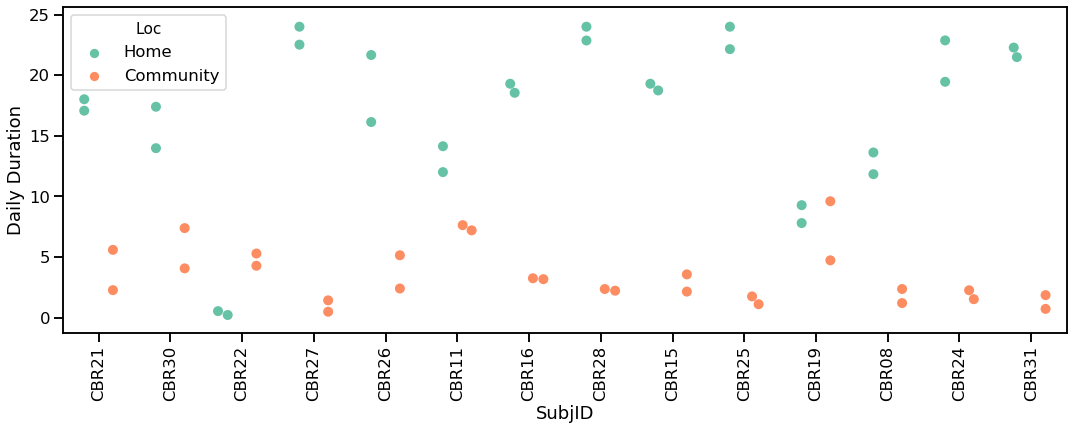

In [215]:
plt.figure(figsize=(18,6))
ax = sns.swarmplot(data=durdata, x='SubjID', y='Daily Duration', hue='Loc', palette='Set2',size=10, dodge=True)
# ax.set_xticks(rotation=90)
plt.xticks(rotation=90)
# ax.legend_.remove()

In [216]:
Datahome['Location'] = 'Home'
Data['Location'] = 'Community'
Features = pd.concat((Datahome,Data))

In [217]:
#rec days per subject (for both braces)
pd.DataFrame({'Community':Data.groupby('SubjID').Date.unique().apply(len), 
         'Home':Datahome.groupby('SubjID').Date.unique().apply(len)})

,Community,Home
SubjID,,
CBR08,27,41
CBR11,68,66
CBR15,30,31
CBR16,27,26
CBR19,4,3
CBR21,53,52
CBR22,28,14
CBR24,31,62
CBR25,29,65


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

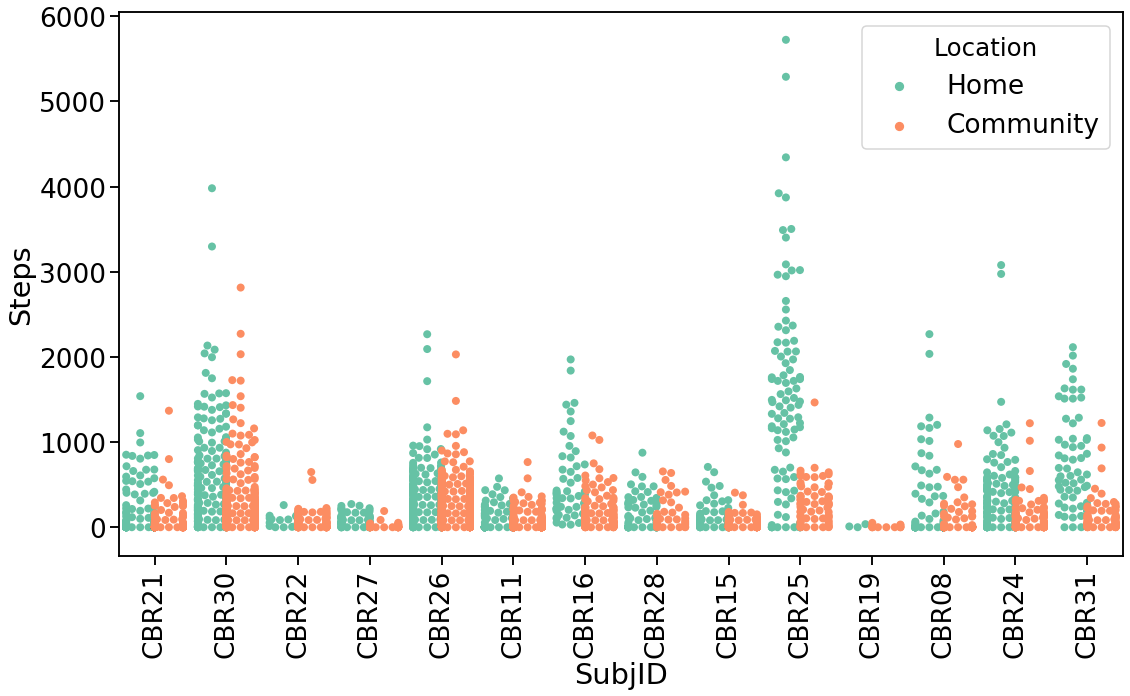

In [140]:
plt.figure(figsize=(18,10))
ax = sns.swarmplot(data=Features, x='SubjID', y='Steps', hue='Location', palette='Set2',size=8, dodge=True)
plt.xticks(rotation=90)

In [241]:
# Features.query('Location=="Home"').plot.scatter(x='Duration',y='Steps')

Is number of steps correlated with the time people is at home? (i.e. are they walking more when they are staying longer at home?)

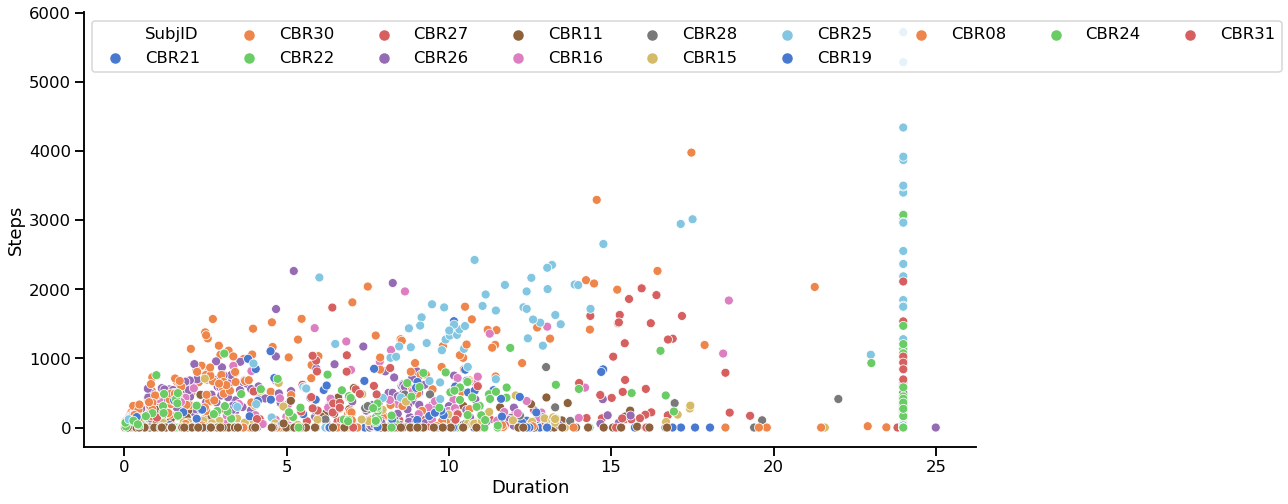

In [246]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(data=Datahome, x='Duration', y='Steps', hue='SubjID', palette="muted")
ax.legend(loc='upper left', ncol = 9)
sns.despine()

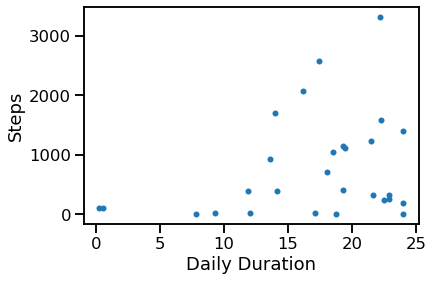

In [249]:
homedur[['Steps','Daily Duration']].plot.scatter(x='Daily Duration',y='Steps')
# plt.figure(figsize=(16,8))
# ax = sns.scatterplot(data=homedur, x='Daily Duration', y='Steps', hue='SubjID', palette="muted")
# ax.legend(loc='upper left', ncol = 9)
# sns.despine()

Is number of steps correlated with the time people spend outside? (i.e. are they walking when they are in the community?)

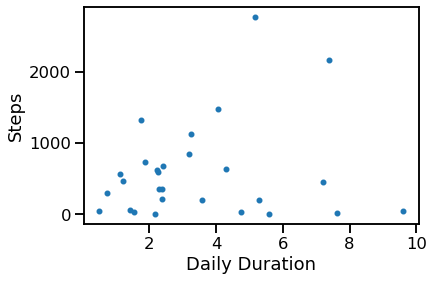

In [211]:
dur[['Steps','Daily Duration']].plot.scatter(x='Daily Duration',y='Steps')

## Statistics on mean features (homedur and dur) per subject

In [23]:
homedur.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs,Loc
0,CBR21,6.799006,6.284861,0.023871,1,231.93,0.69,32.200000,0.206293,17.071111,65.0,60.0,Home
1,CBR30,5.065320,3.038611,0.626585,1,452.17,1.20,1706.117647,0.281388,13.980556,55.0,37.0,Home
2,CBR22,0.251551,0.185833,0.825910,1,332.61,1.00,105.583333,0.356069,0.222778,28.0,2.0,Home
3,CBR27,21.142396,23.997222,0.004652,1,78.82,0.33,15.062500,0.194220,23.997222,72.0,70.0,Home
4,CBR26,11.163413,9.988889,0.204154,1,512.14,1.15,329.650794,0.327492,21.665000,52.0,0.5,Home


In [24]:
homedur[homedur['NewBrace']==1]['Wear Fraction'].median()-homedur[homedur['NewBrace']==0]['Wear Fraction'].median()

-0.25323981297366815

In [25]:
print('MedianHome Baseline Wear Fraction = %.2f'%homedur[homedur['NewBrace']==0]['Wear Fraction'].median())
print('MedianHome Cbrace Wear Fraction = %.2f'%homedur[homedur['NewBrace']==1]['Wear Fraction'].median())
# print('MedianHome differnce = %.2f'%homedur[homedur['NewBrace']==1]['Wear Fraction'].median()-homedur[homedur['NewBrace']==1]['Wear Fraction'].median())
print('MedianHome Baseline Steps = %.2f'%homedur[homedur['NewBrace']==0]['Steps'].median())
print('MedianHome Cbrace Steps = %.2f'%homedur[homedur['NewBrace']==1]['Steps'].median())
print('MedianHome Baseline DailyTime = %.2f h'%homedur[homedur['NewBrace']==0]['Daily Duration'].median())
print('MedianHome Cbrace DailyTime = %.2f h'%homedur[homedur['NewBrace']==1]['Daily Duration'].median())


print('\nMedianComm Baseline Wear Fraction = %.2f'%dur[dur['NewBrace']==0]['Wear Fraction'].median())
print('MedianComm Cbrace Wear Fraction = %.2f'%dur[dur['NewBrace']==1]['Wear Fraction'].median())
print('MedianComm Baseline Steps = %.2f'%dur[dur['NewBrace']==0]['Steps'].median())
print('MedianComm Cbrace Steps = %.2f'%dur[dur['NewBrace']==1]['Steps'].median())
print('MedianComm Baseline DailyTime = %.2f h'%dur[dur['NewBrace']==0]['Daily Duration'].median())
print('MedianComm Cbrace DailyTime = %.2f h'%dur[dur['NewBrace']==1]['Daily Duration'].median())

# print('MedianHome Baseline Steps = %.2f'%homedur[homedur['NewBrace']==0]['Steps per Hour'].median())
# print('MedianHome Cbrace Steps = %.2f'%homedur[homedur['NewBrace']==1]['Steps per Hour'].median())
# print('MedianComm Baseline Steps = %.2f'%dur[dur['NewBrace']==0]['Steps per Hour'].median())
# print('MedianComm Cbrace Steps = %.2f'%dur[dur['NewBrace']==1]['Steps per Hour'].median())


print('\nDaily duration IQR Baseline')
print(np.percentile(dur[dur['NewBrace']==0]['Daily Duration'].values,25),np.percentile(dur[dur['NewBrace']==0]['Daily Duration'].values,75))
print('\nDaily duration IQR Cbrace')
print(np.percentile(dur[dur['NewBrace']==1]['Daily Duration'].values,25),np.percentile(dur[dur['NewBrace']==1]['Daily Duration'].values,75))



MedianHome Baseline Wear Fraction = 0.48
MedianHome Cbrace Wear Fraction = 0.23
MedianHome Baseline Steps = 565.06
MedianHome Cbrace Steps = 328.58
MedianHome Baseline DailyTime = 18.65 h
MedianHome Cbrace DailyTime = 18.64 h

MedianComm Baseline Wear Fraction = 0.94
MedianComm Cbrace Wear Fraction = 0.82
MedianComm Baseline Steps = 473.95
MedianComm Cbrace Steps = 401.33
MedianComm Baseline DailyTime = 2.77 h
MedianComm Cbrace DailyTime = 2.39 h

Daily duration IQR Baseline
2.236736111111111 4.8793402803333334

Daily duration IQR Cbrace
1.2888194444444445 4.619166666666666


In [29]:
# #normality test
# from scipy.stats import ttest_rel, shapiro
# x = homedur[homedur['NewBrace']==0]['Duration_Median']
# fstat,pval = shapiro(x)
# print(fstat,pval)
# y = homedur[homedur['NewBrace']==1]['Duration_Median']
# fstat,pval = shapiro(y)
# print(fstat,pval)
# x = dur[dur['NewBrace']==0]['Duration_Median']
# fstat,pval = shapiro(x)
# print(fstat,pval)
# y = dur[dur['NewBrace']==1]['Duration_Median']
# fstat,pval = shapiro(y)
# print(fstat,pval)

In [26]:
#sign rank test differences in median duration
from scipy.stats import wilcoxon
x = homedur[homedur['NewBrace']==0]['Wear Fraction']
y = homedur[homedur['NewBrace']==1]['Wear Fraction']
tstat,prob = wilcoxon(x,y)
print('Wear Fraction Home',tstat,prob)
x = dur[dur['NewBrace']==0]['Wear Fraction']
y = dur[dur['NewBrace']==1]['Wear Fraction']
tstat,prob = wilcoxon(x,y)
print('Wear Fraction Community',tstat,prob)
x = homedur[homedur['NewBrace']==0]['Steps']
y = homedur[homedur['NewBrace']==1]['Steps']
tstat,prob = wilcoxon(x,y)
print('Steps Home',tstat,prob)
# x = dur[dur['NewBrace']==0]['Steps per Hour']
# y = dur[dur['NewBrace']==1]['Steps per Hour']
x = dur[dur['NewBrace']==0]['Steps']
y = dur[dur['NewBrace']==1]['Steps']
tstat,prob = wilcoxon(x,y)
print('Steps Community',tstat,prob)
x = dur[dur['NewBrace']==0]['Daily Duration']
y = dur[dur['NewBrace']==1]['Daily Duration']
tstat,prob = wilcoxon(x,y)
print('Median Daily duration - Community',tstat,prob)


Wear Fraction Home 32.0 0.19812291175396723
Wear Fraction Community 28.0 0.221330082993901
Steps Home 19.0 0.03546470751403722
Steps Community 41.0 0.4703377962613965
Median Daily duration - Community 28.0 0.12404279309009482


** The new brace does not significantly alter the wear fractions and steps per hour **

## Mobility and clinical features - Baseline

In [192]:
Featsubj = dur.query('NewBrace==0')
Featsubj.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs,Loc
14,CBR21,1.004105,0.341667,0.625459,0,246.46,0.70,350.494118,0.360918,2.273333,65.0,60.0,Community
15,CBR30,0.595975,0.329444,0.982844,0,333.45,0.99,1477.228261,0.337844,4.069028,55.0,37.0,Community
16,CBR22,1.420190,0.368056,0.734635,0,313.69,0.93,198.789474,0.249235,5.292222,28.0,2.0,Community
17,CBR27,0.367698,0.122222,0.978453,0,119.18,0.44,56.571429,0.130778,1.430417,72.0,70.0,Community
18,CBR26,0.424357,0.228333,0.997807,0,443.20,1.22,2770.495192,0.406853,5.149444,52.0,0.5,Community


In [193]:
#add OPUS data
OPUSdata= pd.read_excel('./Clinical Measures/OPUS.xlsx')
sid = OPUSdata.SubjID
newstr = []
for s in sid.values:
    newstr.append(s.replace('-',''))
OPUSdata.SubjID = newstr

In [194]:
Featsubj=pd.merge(Featsubj,OPUSdata.query('NewBrace==0'),on=['SubjID', 'NewBrace'])
Featsubj=Featsubj[['SubjID','NewBrace','Age','BaselineYrs','6mwt','10mwt_ss','OPUS','Steps','Cadence','Wear Fraction',
                   'Daily Duration']]

In [195]:
Featsubj.rename(columns={'Daily Duration':'Time Community'},inplace=True)
Featsubj.head()

,SubjID,NewBrace,Age,BaselineYrs,6mwt,10mwt_ss,OPUS,Steps,Cadence,Wear Fraction,Time Community
0,CBR21,0,65.0,60.0,246.46,0.70,49.59,350.494118,0.360918,0.625459,2.273333
1,CBR30,0,55.0,37.0,333.45,0.99,45.66,1477.228261,0.337844,0.982844,4.069028
2,CBR22,0,28.0,2.0,313.69,0.93,43.94,198.789474,0.249235,0.734635,5.292222
3,CBR27,0,72.0,70.0,119.18,0.44,75.87,56.571429,0.130778,0.978453,1.430417
4,CBR26,0,52.0,0.5,443.20,1.22,39.93,2770.495192,0.406853,0.997807,5.149444


In [196]:
Featsubj['Age']=Featsubj.Age.astype('int')

In [197]:
cmap = sns.diverging_palette(300, 20, 0, 50)

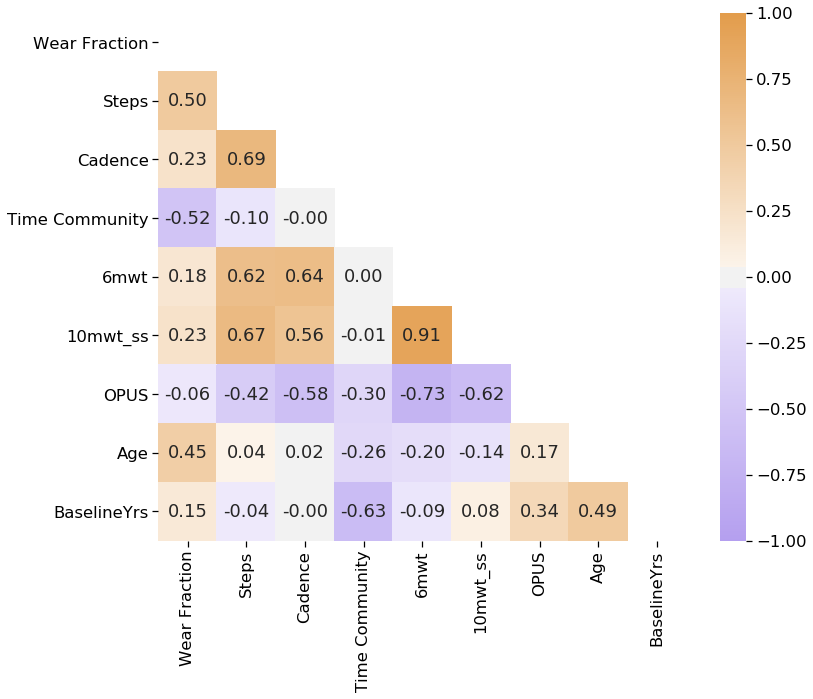

In [198]:
fcorr = Featsubj.drop(['NewBrace','SubjID'],axis=1)[['Wear Fraction','Steps','Cadence','Time Community',
                                                     '6mwt','10mwt_ss','OPUS','Age','BaselineYrs']].corr()
#generate an triangular correlation matrix
mask = np.zeros_like(fcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)
sns.set_context('notebook',font_scale=1.5)
plt.figure(figsize=(12,10))
# sns.heatmap(data=fcorr,mask=mask,cmap="PiYG",annot=True,fmt='.2f',square=True, vmin=-1, vmax=1)
sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=True,fmt='.2f',square=True, vmin=-1, vmax=1)
sns.set_context('talk',font_scale=1)
plt.tight_layout()
plt.savefig('./Figs/corr_personal.jpg',dpi=400)

In [77]:
for x,y in itertools.combinations(Featsubj.drop('SubjID',axis=1).columns,2):
    r = pearsonr(Featsubj[x],Featsubj[y])
    if r[1]<.05:
        print(x,y,r)

BaselineYrs Time Community (-0.6314156258994248, 0.015440194558656951)
6mwt 10mwt_ss (0.9115265510946826, 5.70917770823181e-06)
6mwt OPUS (-0.7286619927008198, 0.003116832675829709)
6mwt Steps (0.6173371830782584, 0.018664878619744477)
6mwt Cadence (0.6386265801429076, 0.013962750458532106)
10mwt_ss OPUS (-0.6206663670534932, 0.017860064926387205)
10mwt_ss Steps (0.6681106969992703, 0.009012493938280876)
10mwt_ss Cadence (0.5647612249959079, 0.035359501690065825)
OPUS Cadence (-0.5829534318163102, 0.028672338541935107)
Steps Cadence (0.6902459570761266, 0.006287647090954931)


/Users/luca/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


## Deep dive into correlations

In [46]:
Featsubj.columns

Index(['SubjID', 'NewBrace', 'Age', 'BaselineYrs', '6mwt', '10mwt_ss', 'OPUS',
       'Steps', 'Cadence', 'Wear Fraction', 'Time Community'],
      dtype='object')

Some correlations are driven by few outliers - so not meaningful - see below, as well as OPUS vs. Cadence

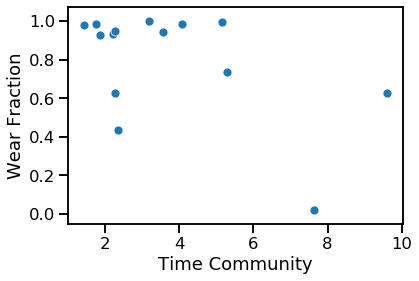

In [44]:
sns.scatterplot(x='Time Community', y='Wear Fraction', data=Featsubj)

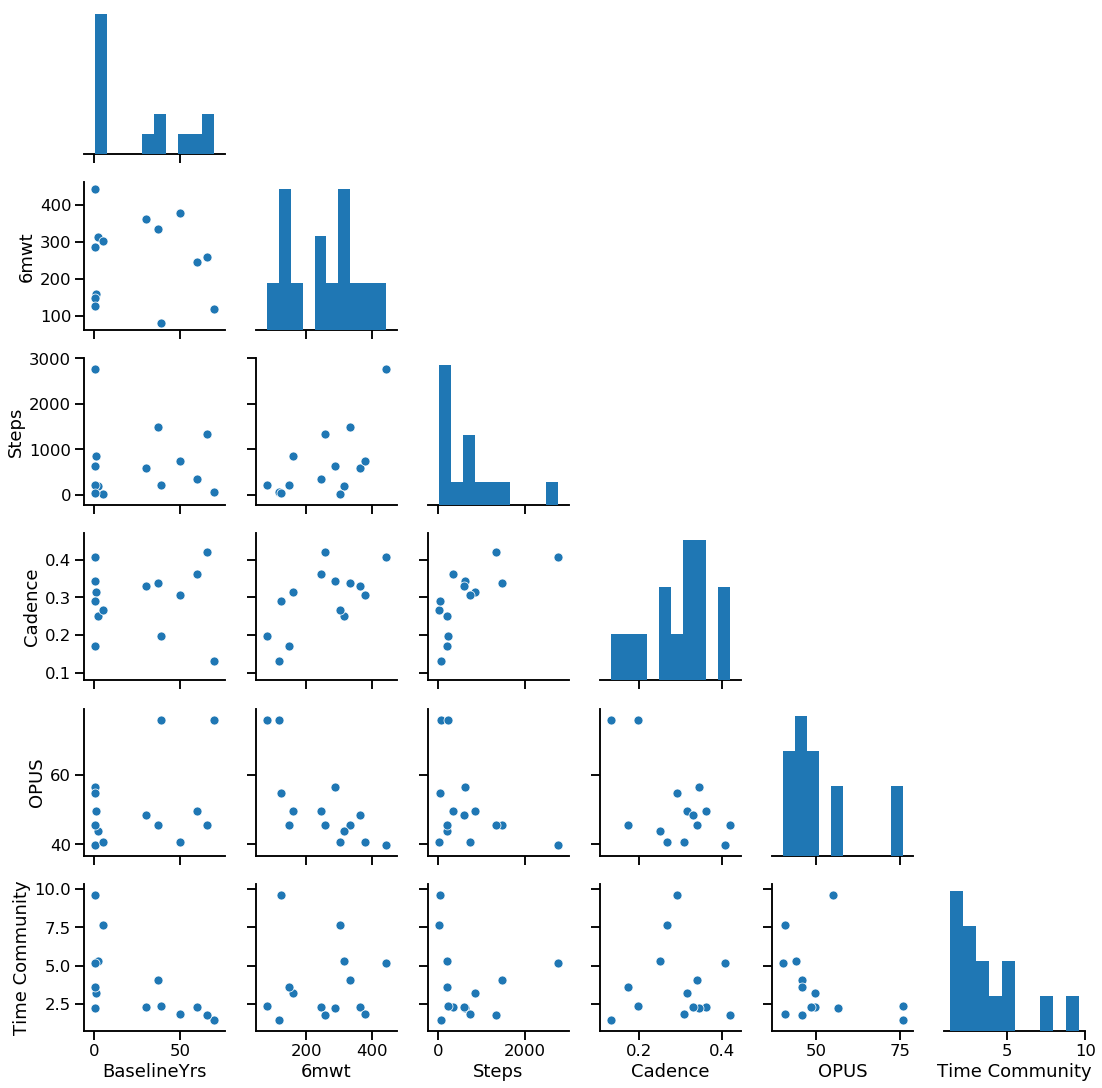

In [54]:
sns.pairplot(data=Featsubj[['BaselineYrs','6mwt','Steps','Cadence','OPUS', 'Time Community']],corner=True)

In [55]:
# from scipy.stats import iqr

# plt.figure(figsize=(15,6))
# plt.subplot(121)
# ax=sns.boxplot(x='NewBrace',y='6mWT',data=Fboth,hue='NewBrace')
# ax.legend_.remove()
# plt.xlabel('Device')
# plt.xticks(np.arange(2),('Personal','C-brace'))
# plt.subplot(122)
# ax=sns.boxplot(x='NewBrace',y='10mWTss',data=Fboth,hue='NewBrace')
# plt.xticks(np.arange(2),('Personal','C-brace'))
# ax.legend_.remove()
# #paired t-test
# from scipy.stats import ttest_rel, shapiro
# for f in ['6mWT','10mWTss']:
#     x = Featsubj[f]
#     y = FeatsubjCBR[f]
#     tstat,prob = ttest_rel(x,y)
#     print(f,tstat,prob)
#     print(np.median(x),np.median(y))
#     print(np.percentile(x,25),np.percentile(x,75),np.percentile(y,25),np.percentile(y,75))
    


In [46]:
# confidence interval analysis

In [47]:
# F = Featsubj.drop(['NewBrace','SubjID'],axis=1)
# for i in F.columns:
#     for j in F.columns:
#         print(i,j)
#         x = Featsubj[i]
#         y = Featsubj[j]
#         print(pearsonr(x,y))

In [48]:
# f = 'UsageFrac'
# x = Fboth[Fboth['NewBrace']==0][f]
# y = Fboth[Fboth['NewBrace']==1][f]
# plt.figure(figsize=(8,6))
# plt.scatter(x,y)    
# mx=min(x)
# my=min(y)
# m = min(mx,my)
# Mx=max(x)
# My=max(y)
# M =max(Mx,My)
# plt.plot([m,M],[m,M])
# plt.title('Usage Fraction')
# plt.xlabel('Personal device')
# plt.xlabel('C-brace')

## (Cbrace - Baseline) mobility and clinical correlations

In [131]:
FeatsubjCBR = dur.query('NewBrace==1')
FeatsubjCBR.head()

,SubjID,Duration_Mean,Duration_Median,Wear Fraction,NewBrace,6mwt,10mwt_ss,Steps,Cadence,Daily Duration,Age,BaselineYrs,Loc
0,CBR21,1.928765,0.661944,0.033078,1,231.93,0.69,5.776119,0.362795,5.595833,65.0,60.0,Community
1,CBR30,1.001469,0.411111,0.938007,1,452.17,1.20,2169.580460,0.322353,7.388889,55.0,37.0,Community
2,CBR22,2.207157,0.511111,0.845676,1,332.61,1.00,630.843137,0.284543,4.285000,28.0,2.0,Community
3,CBR27,0.491389,0.491389,1.000000,1,133.60,0.46,51.000000,0.202273,0.491389,72.0,70.0,Community
4,CBR26,0.536108,0.224167,0.974758,1,512.14,1.15,677.558442,0.361475,2.408611,52.0,0.5,Community


In [132]:
FeatsubjCBR=pd.merge(FeatsubjCBR, OPUSdata.query('NewBrace==1'),on=['SubjID', 'NewBrace'])
FeatsubjCBR=FeatsubjCBR[['SubjID','NewBrace','Age','BaselineYrs','6mwt','10mwt_ss','OPUS','Steps','Cadence','Wear Fraction',
                   'Daily Duration']]
FeatsubjCBR.rename(columns={'Daily Duration':'Time Community'},inplace=True)

In [133]:
FeatsubjCBR

,SubjID,NewBrace,Age,BaselineYrs,6mwt,10mwt_ss,OPUS,Steps,Cadence,Wear Fraction,Time Community
0,CBR21,1,65.0,60.00,231.93,0.69,44.79,5.776119,0.362795,0.033078,5.595833
1,CBR30,1,55.0,37.00,452.17,1.20,39.93,2169.580460,0.322353,0.938007,7.388889
2,CBR22,1,28.0,2.00,332.61,1.00,47.52,630.843137,0.284543,0.845676,4.285000
3,CBR27,1,72.0,70.00,133.60,0.46,41.51,51.000000,0.202273,1.000000,0.491389
4,CBR26,1,52.0,0.50,512.14,1.15,69.12,677.558442,0.361475,0.974758,2.408611
5,CBR11,1,35.0,5.00,344.42,0.92,45.66,450.664740,0.285979,0.632417,7.202222
6,CBR16,1,44.0,1.00,419.40,1.03,58.59,1128.192308,0.279109,1.000000,3.253056
7,CBR28,1,44.0,0.08,356.29,0.91,52.00,352.000000,0.301772,0.800000,2.365278
8,CBR15,1,68.0,0.50,300.41,0.80,46.57,0.000000,NaN,0.000000,2.152778
9,CBR25,1,68.0,66.00,290.50,0.86,50.75,567.153846,0.364742,0.923077,1.112222


CBR 15 never worn the Cbrace - check

In [142]:
Fdiff

,6mwt,10mwt_ss,OPUS,Steps,Cadence,Wear Fraction,Time Community,SubjID,Age,BaselineYrs
0,-14.53,-0.01,-4.80,-344.717998,0.001876,-0.592380,3.322500,CBR21,65,60.00
1,118.72,0.21,-5.73,692.352199,-0.015492,-0.044837,3.319861,CBR30,55,37.00
2,18.92,0.07,3.58,432.053664,0.035307,0.111041,-1.007222,CBR22,28,2.00
3,14.42,0.02,-34.36,-5.571429,0.071495,0.021547,-0.939028,CBR27,72,70.00
4,68.94,-0.07,29.19,-2092.936751,-0.045378,-0.023049,-2.740833,CBR26,52,0.50
5,41.93,0.27,4.94,435.473900,0.019352,0.612131,-0.431111,CBR11,35,5.00
6,260.35,0.65,9.00,279.082719,-0.035676,0.000000,0.075833,CBR16,44,1.00
7,69.40,0.34,-4.65,-271.275862,-0.041180,-0.132507,0.137778,CBR28,44,0.08
8,151.26,0.36,0.91,-207.753623,NaN,-0.946003,-1.421111,CBR15,68,0.50
9,32.33,0.08,5.09,-759.659713,-0.054613,-0.060837,-0.644444,CBR25,68,66.00


In [147]:
#feature difference
F = FeatsubjCBR.copy()
F = (FeatsubjCBR.drop(['SubjID','NewBrace','Age','BaselineYrs'],axis=1)
     -Featsubj.drop(['SubjID','NewBrace','Age','BaselineYrs'],axis=1))
Fdiff = pd.concat((F,Featsubj[['SubjID','Age','BaselineYrs']]),axis=1)

#reorder
Fdiff=Fdiff[['Wear Fraction','Steps','Cadence','Time Community','6mwt','10mwt_ss','OPUS','Age','BaselineYrs','SubjID']]

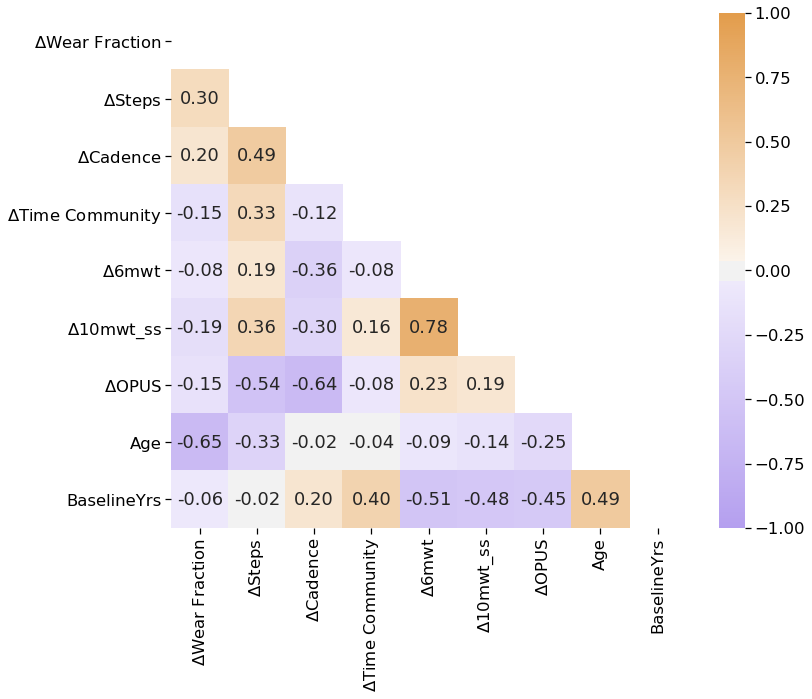

In [188]:
Fdiff.rename(columns={'Steps': r'$\Delta$Steps', 'Wear Fraction': r'$\Delta$Wear Fraction', 'Cadence':r'$\Delta$Cadence',
                      'Time Community': r'$\Delta$Time Community', '6mwt': r'$\Delta$6mwt', 
                      '10mwt_ss': r'$\Delta$10mwt_ss', 'OPUS': r'$\Delta$OPUS'}, inplace=True)
fcorr = Fdiff.drop(['SubjID'],axis=1).corr()

mask = np.zeros_like(fcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)
sns.set_context('notebook',font_scale=1.5)
plt.figure(figsize=(12,10))
sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=True,fmt='.2f',square=True, vmin=-1, vmax=1)
sns.set_context('talk',font_scale=1)
plt.tight_layout()
plt.savefig('./Figs/DiffCorr.jpg', dpi=400)
# plt.title('Pearson r - Difference Features between C-brace and Personal device')

In [189]:
Fdiff.fillna(value=0,inplace=True)

In [190]:
sigfeat = []
for x,y in itertools.combinations(Fdiff.drop('SubjID',axis=1).columns,2):
    r = pearsonr(Fdiff[x],Fdiff[y])
    if r[1]<.05:
        print(x,y,r)
        sigfeat.append((x,y))        

$\Delta$Wear Fraction Age (-0.6465441425752811, 0.01246763210757784)
$\Delta$Steps $\Delta$OPUS (-0.5413183187126185, 0.045595342067454823)
$\Delta$Cadence $\Delta$OPUS (-0.6434559155446266, 0.013035421812560323)
$\Delta$6mwt $\Delta$10mwt_ss (0.7755526060634168, 0.0011158486693564462)


* the older the participant, the lower the difference in wear time (i.e. they tend to wear the 2 braces the same time)
* The lower the change in cadence or steps the higher the change in OPUS - see below

Text(0, 0.5, '$\\Delta$OPUS')

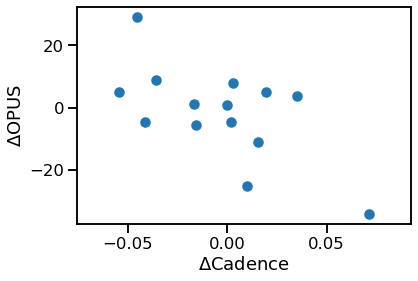

In [191]:
x,y = sigfeat[-2]
xd = Fdiff[x]; yd = Fdiff[y]
plt.scatter(x=xd, y=yd)
plt.xlabel(x); plt.ylabel(y)

As above, these correlations are driven by outliers and should not used to conclude anything

# Old analysis 

-0.648892996623 -0.963645553031 -0.36694221503


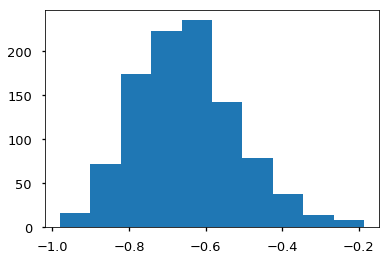

In [117]:
# #resample correlations to bootstrap 95%CI
# xyboot = []; r_boot =[]
# xy = Fdiff[['UsageFrac','Age']]
# for k in range(1000):
#     inds = np.random.choice(xy.index,len(xy.index)) #sample indices w replacement
#     vals = xy.iloc[inds].values
#     r = pearsonr(vals[:,0],vals[:,1]) #compute corr coefficient on bootstrap replica
#     r_boot.append(r[0]) #store corr coeff

# plt.hist(r_boot)
# mu = np.mean(r_boot)
# print(mu,np.percentile(r_boot,0.25),np.percentile(r_boot,97.5))

In [115]:
np.p

array([10,  0])

In [99]:
np.percentile(r_boot,97.5)

-0.33930873505146458

In [73]:
vals = xy.iloc[np.array([0,2,3])].values

In [112]:
x = Fdiff['Steps per Hour']
y = Fdiff['6mWT']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['6mWT']
print(pearsonr(x,y))
x = Fdiff['DTimeCommunity']
y = Fdiff['6mWT']
print(pearsonr(x,y))

x = Fdiff['Steps per Hour']
y = Fdiff['10mWTss']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['10mWTss']
print(pearsonr(x,y))
x = Fdiff['DTimeCommunity']
y = Fdiff['10mWTss']
print(pearsonr(x,y))

x = Fdiff['Steps per Hour']
y = Fdiff['OPUS']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['OPUS']
print(pearsonr(x,y))
x = Fdiff['DTimeCommunity']
y = Fdiff['OPUS']
print(pearsonr(x,y))

x = Fdiff['Steps per Hour']
y = Fdiff['Age']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['Age']
print(pearsonr(x,y))
x = Fdiff['BaselineYrs']
y = Fdiff['DTimeCommunity']
print(pearsonr(x,y))
x = Fdiff['BaselineYrs']
y = Fdiff['6mWT']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['OPUS']
print(pearsonr(x,y))

(-0.0093011021795821464, 0.97482525568656486)
(-0.083864255883296018, 0.77561566176742236)
(-0.083035445434608515, 0.77778223613865505)
(0.014836525038428475, 0.95985179379654972)
(-0.1875291440728305, 0.52088241697670723)
(0.15641246277816606, 0.59335308046377011)
(-0.42090976001189245, 0.13394439612967199)
(-0.1473328917394667, 0.61522434384588243)
(-0.082877155062630409, 0.7781961906151279)
(-0.57935986372789317, 0.029911599136684092)
(-0.64654414257528114, 0.01246763210757784)
(0.39729851678828448, 0.15952766045946445)
(-0.50617952475326855, 0.064766546479358228)
(-0.1473328917394667, 0.61522434384588243)


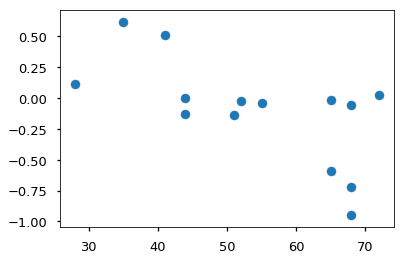

In [58]:
plt.scatter(Fdiff['Age'],Fdiff['UsageFrac'])

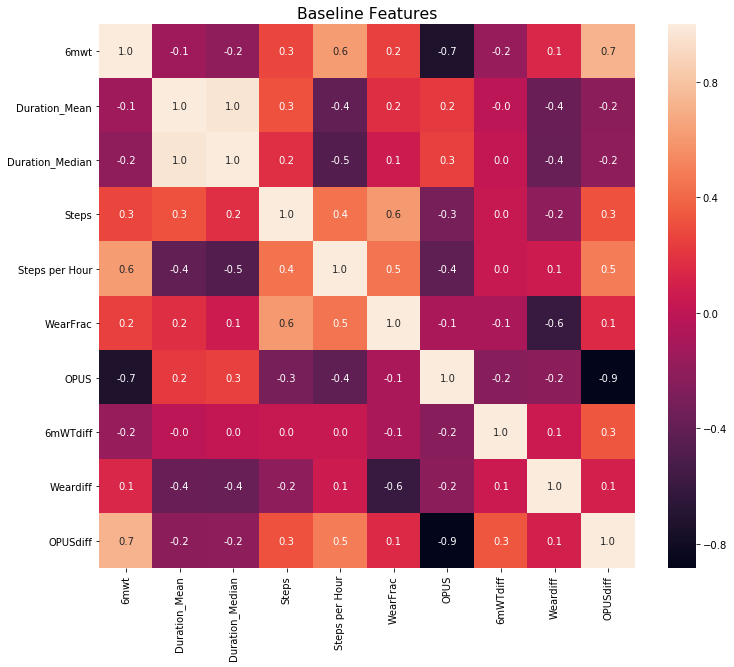

In [26]:
D = homedur[homedur['NewBrace']==0].drop('SubjID',axis=1)

D['6mWTdiff']=homedur.loc[homedur['NewBrace']==1,'6mwt'].values-homedur.loc[homedur['NewBrace']==0,'6mwt'].values
D['Weardiff']=homedur.loc[homedur['NewBrace']==1,'UsageFrac'].values-homedur.loc[homedur['NewBrace']==0,'UsageFrac'].values
D['OPUSdiff']=homedur.loc[homedur['NewBrace']==1,'OPUS'].values-homedur.loc[homedur['NewBrace']==0,'OPUS'].values

fcorr = D.drop('NewBrace',axis=1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1)
plt.title('Baseline Features')

In [27]:
homeTemp = homedur[['NewBrace','SubjID','UsageFrac']].rename(columns={'UsageFrac':'HomeUsageFrac'})
Featsubj = pd.merge(left = Featsubj,right = homeTemp, how='inner', left_on = ['NewBrace','SubjID'], 
         right_on = ['NewBrace','SubjID'])

In [28]:
Featsubj.head()

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,Npoints,Steps,Steps per Hour,SubjID,WearFrac,top2RelDur,OPUS,HomeWearFrac
0,0.85,0.69,231.93,65,60.0,2.061553,1.507332,0.107750,0.661944,1.015304,1,39,67,2.283582,13.478047,CBR21,0.033078,0.665099,44.79,0.019349
1,1.47,1.20,452.17,55,37.0,2.853499,-1.798453,0.021663,0.411111,0.921783,1,83,174,286.632184,386.364495,CBR30,0.938007,0.471777,39.93,0.360443
2,1.20,1.00,332.61,28,2.0,1.817652,-0.853575,0.022623,0.511111,0.828132,1,29,51,96.019608,222.484325,CBR22,0.845676,0.686630,47.52,0.847683
3,0.63,0.46,133.60,72,70.0,0.471462,-4.816799,0.007647,0.491389,2.330390,1,2,2,51.000000,100.778111,CBR27,1.000000,1.000000,41.51,0.004478
4,1.58,1.15,512.14,52,0.5,2.367757,-4.421965,0.005246,0.224167,0.658080,1,33,77,134.064935,361.052923,CBR26,0.974758,0.506524,69.12,0.050284


## Cbrace vs Baseline features

In [29]:
#** Regression Analysis **
# from scipy import stats
# features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','UsageFrac']
# outcome = ['UsageFrac']

# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     x-y
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x.values.astype('float32'),(y.values-x.values).astype('float32'))
#     print(f, slope,intercept,p_value)
#     plt.figure(figsize=(8,6))
#     sns.regplot(x.astype('float32'),(y.values-x.values).astype('float32'))

In [30]:
Featsubj

NameError: name 'Featsubj' is not defined

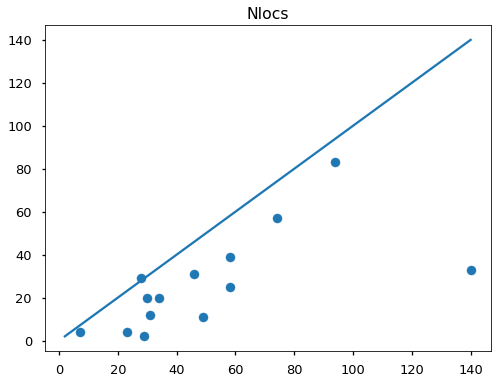

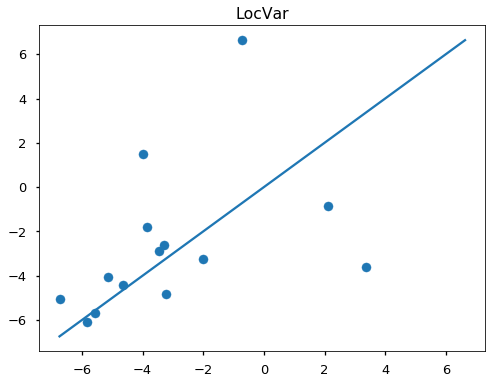

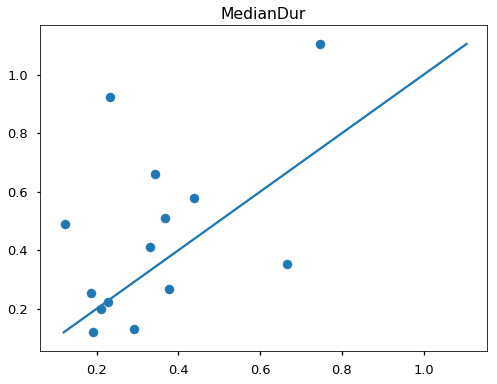

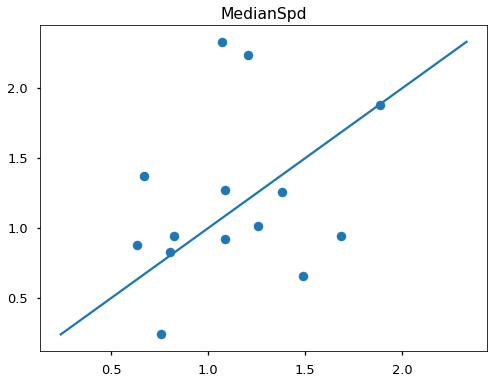

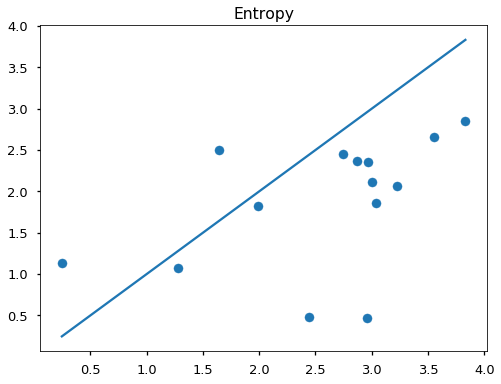

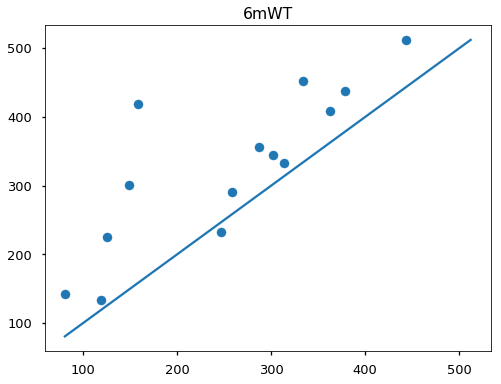

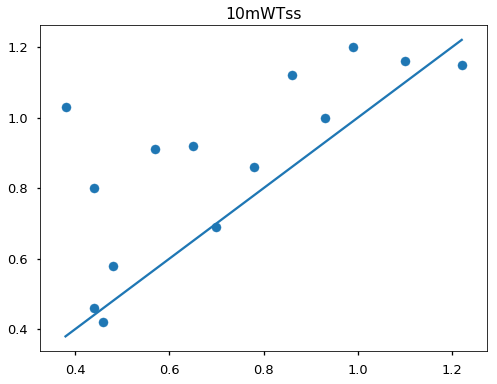

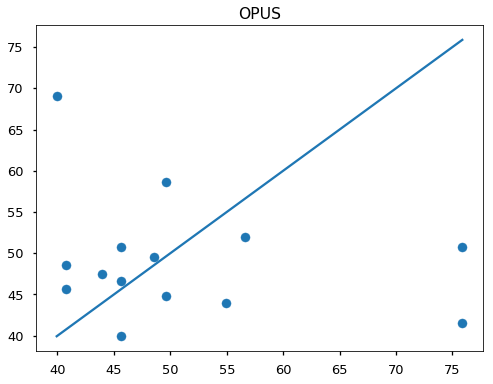

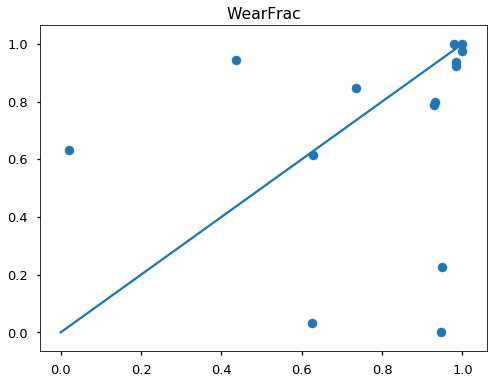

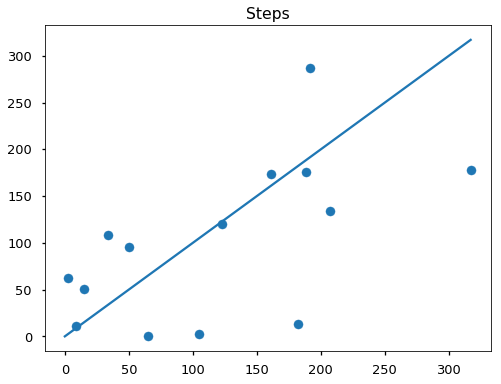

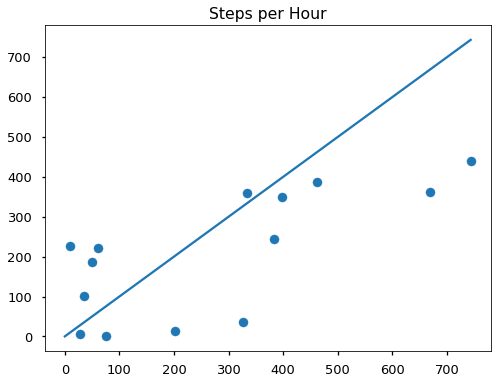

In [31]:
features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','OPUS','UsageFrac', 'Steps', 'Steps per Hour']
outcome = ['UsageFrac']

for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)    
    mx=min(x)
    my=min(y)
    m = min(mx,my)
    Mx=max(x)
    My=max(y)
    M =max(Mx,My)
    plt.plot([m,M],[m,M])
    plt.title(f)
    if f == 'MeanDistHome':
        plt.xlim([-10,200])
        plt.ylim([-10,200])
    
    


In [249]:
# #shapiro test for normality - sanity check
# for i in range(1,4):
#     n = 10**i
#     x = np.random.randn(n)
#     y = np.random.randn(n)
#     fstat,pval = shapiro(x-y)
#     print(n,fstat,pval)

In [248]:
# #normality test
# from scipy.stats import ttest_rel, shapiro

# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     fstat,pval = shapiro(x)
#     print(f,tstat,pval)

## t-test / non-parametric comparisons between baseline and cbrace features

In [250]:
# #paired t-test
# from scipy.stats import ttest_rel, shapiro
# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     tstat,prob = ttest_rel(x,y)
#     print(f,tstat,prob)
    


In [32]:
from scipy.stats import wilcoxon
for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    tstat,prob = wilcoxon(x,y)
    print(f,tstat,prob)


Nlocs 1.0 0.0012114149768
LocVar 43.0 0.550923682773
MedianDur 32.0 0.198122911754
MedianSpd 48.0 0.777564616857
Entropy 13.0 0.0131503642343
6mWT 2.0 0.00152327574137
10mWTss 10.0 0.00763041473925
OPUS 51.0 0.924978307121
WearFrac 28.0 0.221330082994
Steps 43.0 0.550923682773
Steps per Hour 33.0 0.220898890668
